In [25]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from functools import partial
from scipy import stats
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import scipy.stats
%matplotlib inline

In [2]:
brrfile = '../data/BRR Index.xlsx'
btcfile = '../data/BTC CME Future.xlsx'
crixfile = '../data/crix.json'

In [3]:
brrdata = pd.read_excel(brrfile,  # import csv-data into DataFrame
                   index_col=0, # take first column as index
                   parse_dates=True)  # index values are datetime
btcdata = pd.read_excel(btcfile,  # import csv-data into DataFrame
                   index_col=0, # take first column as index
                   parse_dates=True)  # index values are datetime

In [4]:
d = pd.read_json(crixfile)
crixdata = pd.DataFrame(data=d['price'].values, index=d['date'], columns=['price_crix'])

In [5]:
crixdata.head()

,price_crix
date,
2014-07-31,1000.000000
2014-08-01,1018.202717
2014-08-02,1008.772389
2014-08-03,1004.416500
2014-08-04,1004.984138


In [6]:
brrdata.head()

,Last Price,Open Price,High Price,Low Price
Date,,,,
2020-09-04,10273.83,10273.83,10273.83,10273.83
2020-09-03,10870.49,10870.49,10870.49,10870.49
2020-09-02,11325.01,11325.01,11325.01,11325.01
2020-09-01,11862.46,11862.46,11862.46,11862.46
2020-08-31,11720.10,11720.10,11720.10,11720.10


In [7]:
brrdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 930 entries, 2020-09-04 to 2018-02-09
Data columns (total 4 columns):
Last Price    930 non-null float64
Open Price    911 non-null float64
High Price    911 non-null float64
Low Price     911 non-null float64
dtypes: float64(4)
memory usage: 36.3 KB


In [8]:
btcdata.head()

,Last Price,Open Price,High Price,Low Price,BTC1 Curncy - Volume
Date,,,,,
2020-09-04,10480,10730.0,10740.0,10355.0,13711.0
2020-09-03,10720,11710.0,11710.0,10840.0,15412.0
2020-09-02,11460,12405.0,12405.0,11530.0,17210.0
2020-09-01,12075,12050.0,12450.0,12050.0,8919.0
2020-08-31,11835,11735.0,11915.0,11705.0,4865.0


In [9]:
btcdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 686 entries, 2020-09-04 to 2017-12-15
Data columns (total 5 columns):
Last Price              686 non-null int64
Open Price              683 non-null float64
High Price              683 non-null float64
Low Price               683 non-null float64
BTC1 Curncy - Volume    683 non-null float64
dtypes: float64(4), int64(1)
memory usage: 32.2 KB


In [10]:
data = btcdata.join(brrdata,lsuffix='_btc', rsuffix='_brr', how='inner')
data = data.join(crixdata, how='inner')

In [11]:
data.head()

,Last Price_btc,Open Price_btc,High Price_btc,Low Price_btc,BTC1 Curncy - Volume,Last Price_brr,Open Price_brr,High Price_brr,Low Price_brr,price_crix
2020-09-04,10480,10730.0,10740.0,10355.0,13711.0,10273.83,10273.83,10273.83,10273.83,29614.314902
2020-09-03,10720,11710.0,11710.0,10840.0,15412.0,10870.49,10870.49,10870.49,10870.49,33049.664458
2020-09-02,11460,12405.0,12405.0,11530.0,17210.0,11325.01,11325.01,11325.01,11325.01,34623.237089
2020-09-01,12075,12050.0,12450.0,12050.0,8919.0,11862.46,11862.46,11862.46,11862.46,33833.920615
2020-08-31,11835,11735.0,11915.0,11705.0,4865.0,11720.10,11720.10,11720.10,11720.10,33882.473739


In [12]:
data['return_btc'] = np.log(data['Last Price_btc']/data['Last Price_btc'].shift(-1))
data['return_brr'] = np.log(data['Last Price_brr']/data['Last Price_brr'].shift(-1))
data['return_crix'] = np.log(data['price_crix']/data['price_crix'].shift(-1))

In [13]:
data.head()

,Last Price_btc,Open Price_btc,High Price_btc,Low Price_btc,BTC1 Curncy - Volume,Last Price_brr,Open Price_brr,High Price_brr,Low Price_brr,price_crix,return_btc,return_brr,return_crix
2020-09-04,10480,10730.0,10740.0,10355.0,13711.0,10273.83,10273.83,10273.83,10273.83,29614.314902,-0.022642,-0.056452,-0.109754
2020-09-03,10720,11710.0,11710.0,10840.0,15412.0,10870.49,10870.49,10870.49,10870.49,33049.664458,-0.066752,-0.040962,-0.046514
2020-09-02,11460,12405.0,12405.0,11530.0,17210.0,11325.01,11325.01,11325.01,11325.01,34623.237089,-0.052274,-0.046365,0.023061
2020-09-01,12075,12050.0,12450.0,12050.0,8919.0,11862.46,11862.46,11862.46,11862.46,33833.920615,0.020076,0.012073,-0.001434
2020-08-31,11835,11735.0,11915.0,11705.0,4865.0,11720.10,11720.10,11720.10,11720.10,33882.473739,0.017473,0.023398,0.033484


In [14]:
data.dropna(inplace=True)

In [15]:
np.corrcoef(data['return_brr'], data['return_btc'])

array([[1.        , 0.78828599],
       [0.78828599, 1.        ]])

In [16]:
np.corrcoef(data['return_brr'], data['return_crix'])

array([[1.        , 0.54782409],
       [0.54782409, 1.        ]])

In [17]:
np.corrcoef(data['return_btc'], data['return_crix'])

array([[1.        , 0.28688812],
       [0.28688812, 1.        ]])

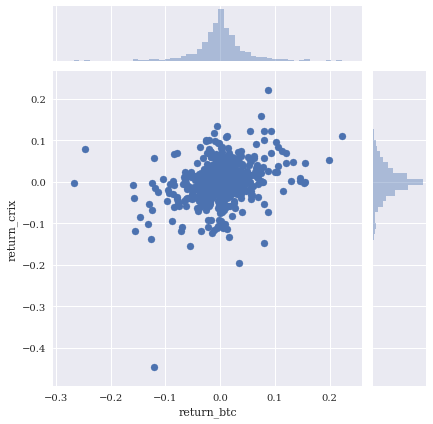

In [18]:
sns.jointplot(data=data, x="return_btc", y="return_crix")


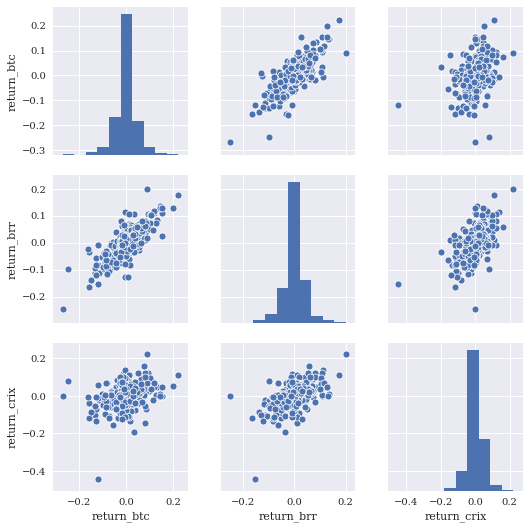

In [19]:
sns.pairplot(data.iloc[:,-3:])

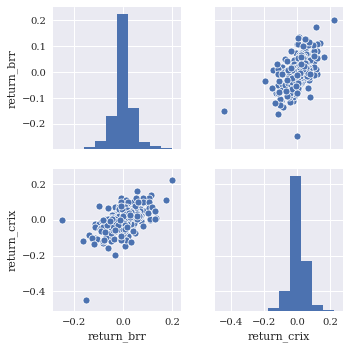

In [24]:
sns.pairplot(data.iloc[:,-2:])

In [ ]:
hist_brr = np.histogram(data, bins=100)
hist_dist_brr = scipy.stats.rv_histogram(hist)

In [46]:
data = data.iloc[:,-3:]
data.head()

,return_btc,return_brr,return_crix
2020-09-04,-0.022642,-0.056452,-0.109754
2020-09-03,-0.066752,-0.040962,-0.046514
2020-09-02,-0.052274,-0.046365,0.023061
2020-09-01,0.020076,0.012073,-0.001434
2020-08-31,0.017473,0.023398,0.033484


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


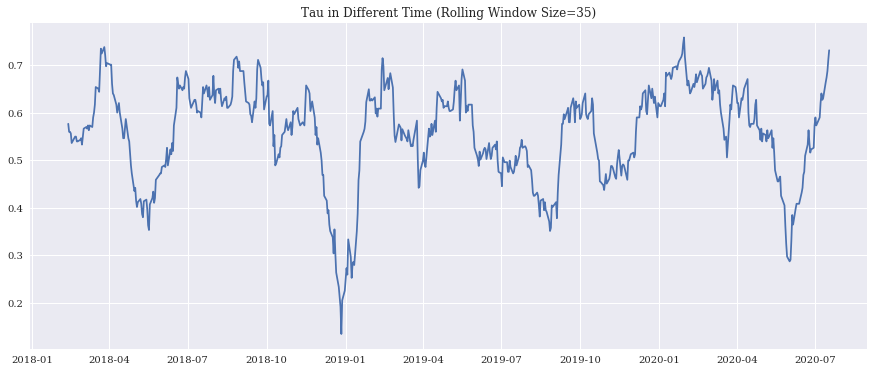

In [82]:
tau_arr = []
p_arr = []
window_size = 35
for t in range(len(data)-window_size):
    tau = stats.kendalltau(data.iloc[1+t:1+t+window_size,0],
                           data.iloc[1+t:1+t+window_size,1])
    tau_arr.append(tau[0])
    p_arr.append(tau[1])

plt.figure(figsize=(15,6)) 
plt.title('Tau in Different Time (Rolling Window Size=%s)'%window_size)
plt.plot(data.iloc[window_size:t+window_size+1,:].index,tau_arr)

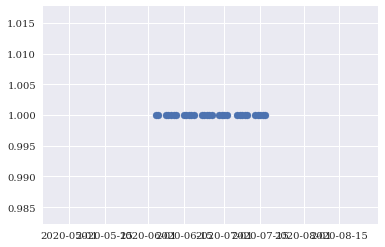

In [89]:
x = data.iloc[window_size:30+window_size+1,:].index
plt.scatter(x, np.ones(len(x)))

BTC Future btc
BTC Price  brr stands for bitcoin reference rate

Pairs (Cryptos) 
Short Crix Long BTC future (money making part)
Short BTC future Long Bitcoin 

Pairs (Traditional)
Short S&P 500 Future Long S&P 500
Short Germany Reference Bond Long 5Yrs CDS Germany


What I need is:
1. Marginals (type of distribution e.g. t-distribution, and their parameters)
2. Copula (type e.g. Frank, and their parameters theta)
3. Metadata (e.g. starting day - end day? What kind of return? Log return or arithmetic return? or geometric?) 

I suggest we stick with log return $\text{log return} = \log\left(\frac{P_{t+1}}{P_{t}}\right)$

Output from Francis:
1. The distribution of the hedge portfolio with different $\chi$
